<a href="https://colab.research.google.com/github/Sristi222/NepaliFakeCurrencyDetection/blob/main/Coursewok_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [67]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset'

In [2]:
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_EPOCHS = 25  # Increased number of epochs
LEARNING_RATE = 0.0001  # Lower learning rate for fine-tuning

In [4]:
# Data preprocessing with augmentation
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_validation = ImageDataGenerator(rescale=1.0 / 255.0)

In [7]:
# Load train, validation, and test datasets
train_data = datagen_train.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

Found 190 images belonging to 2 classes.


In [9]:
validation_data = datagen_validation.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Validation",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 75 images belonging to 2 classes.


In [10]:
test_data = datagen_validation.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 130 images belonging to 2 classes.


In [12]:
# Load pre-trained MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [26]:
# Load pre-trained MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [27]:
# Extract features for the training set
train_features = feature_extractor.predict(train_data, verbose=1)
train_features = train_features.reshape(train_features.shape[0], -1)  # Flatten features
train_labels = train_data.classes

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


In [30]:
# Extract features for the validation set
validation_features = feature_extractor.predict(validation_data, verbose=1)
validation_features = validation_features.reshape(validation_features.shape[0], -1)  # Flatten features
validation_labels = validation_data.classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 741ms/step


In [28]:
# Extract features for the test set
test_features = feature_extractor.predict(test_data, verbose=1)
test_features = test_features.reshape(test_features.shape[0], -1)
test_labels = test_data.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 878ms/step


In [15]:
# Build CNN Model
cnn_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

In [18]:
# Train the Model
history = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=NUM_EPOCHS,
    callbacks=callbacks
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.4678 - loss: 0.9507 - val_accuracy: 0.4667 - val_loss: 0.7507 - learning_rate: 1.0000e-04
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4726 - loss: 0.8971 - val_accuracy: 0.5600 - val_loss: 0.6312 - learning_rate: 1.0000e-04
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6613 - loss: 0.6958 - val_accuracy: 0.7067 - val_loss: 0.5418 - learning_rate: 1.0000e-04
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6931 - loss: 0.5814 - val_accuracy: 0.7733 - val_loss: 0.4721 - learning_rate: 1.0000e-04
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7541 - loss: 0.5486 - val_accuracy: 0.8267 - val_loss: 0.4219 - learning_rate: 1.0000e-04
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7749 - loss: 0.4891 - val_accuracy: 0.8400 - val_loss: 0.3798 - learning_rate: 1.0000e-04
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8194 - loss: 0.4673 - val_accuracy: 0

In [20]:
# Unfreeze Some Layers for Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Freeze all but the last 50 layers
    layer.trainable = False


In [21]:
# Recompile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # Use a lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Recompile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # Use a lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Fine-Tune the Model
fine_tune_epochs = 10
history_fine_tune = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=fine_tune_epochs,
    callbacks=callbacks
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9189 - loss: 0.2674 - val_accuracy: 0.9733 - val_loss: 0.1276 - learning_rate: 1.0000e-05
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8878 - loss: 0.3276 - val_accuracy: 0.9733 - val_loss: 0.1169 - learning_rate: 1.0000e-05
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9436 - loss: 0.2130 - val_accuracy: 0.9733 - val_loss: 0.1054 - learning_rate: 1.0000e-05
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9312 - loss: 0.2413 - val_accuracy: 0.9733 - val_loss: 0.0954 - learning_rate: 1.0000e-05
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9151 - loss: 0.2269 - val_accuracy: 0.9867 - val_loss: 0.0862 - learning_rate: 1.0000e-05
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8974 - loss: 0.2342 - val_accuracy: 1.0000 - val_loss: 0.0786 - learning_rate: 1.0000e-05
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9243 - loss: 0.2192 - val_

In [24]:
# Evaluate on the Test Set
test_loss, test_accuracy = cnn_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.9923 - loss: 0.0563
Test Loss: 0.0725
Test Accuracy: 98.46%


In [58]:
# Train SVM model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(train_features, train_labels)

SVC(kernel='linear', probability=True)

In [59]:
# Evaluate SVM
#svm_predictions = svm_model.predict(test_features)
#svm_accuracy = np.mean(svm_predictions == test_labels)
#print(f"SVM Test Accuracy: {svm_accuracy * 100:.2f}%")

SVM Test Accuracy: 63.85%


In [61]:
# Train KNN model
#knn_model = KNeighborsClassifier(n_neighbors=3)
#knn_model.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [62]:
# Evaluate KNN
#knn_predictions = knn_model.predict(test_features)
#knn_accuracy = np.mean(knn_predictions == test_labels)
#print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")

KNN Test Accuracy: 73.85%


In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


In [69]:
# **Feature Scaling**
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
test_features_scaled = scaler.transform(test_features)

In [70]:
# **Dimensionality Reduction with PCA (Optional)**
pca = PCA(n_components=50)  # Reduce features to 50 dimensions
train_features_pca = pca.fit_transform(train_features_scaled)
validation_features_pca = pca.transform(validation_features_scaled)
test_features_pca = pca.transform(test_features_scaled)


In [71]:
# **Balance Dataset with SMOTE (Optional)**
smote = SMOTE()
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features_pca, train_labels)

In [75]:
# **SVM Model Hyperparameter Tuning**
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, cv=2, scoring='accuracy', verbose=2)
svm_grid.fit(train_features_resampled, train_labels_resampled)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=2, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [79]:
# **Best SVM Model**
svm_model = svm_grid.best_estimator_

In [80]:
# **Evaluate SVM**
svm_test_predictions = svm_model.predict(test_features_pca)
svm_test_accuracy = accuracy_score(test_labels, svm_test_predictions)

In [81]:
print(f"\nBest SVM Parameters: {svm_grid.best_params_}")
print(f"SVM Test Accuracy: {svm_test_accuracy * 100:.2f}%")


Best SVM Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVM Test Accuracy: 71.54%


In [96]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [97]:
# Evaluate KNN
knn_predictions = knn_model.predict(test_features)
knn_accuracy = np.mean(knn_predictions == test_labels)
print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")

KNN Test Accuracy: 73.85%


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      1.00      0.99        76
        Real       1.00      0.96      0.98        54

    accuracy                           0.98       130
   macro avg       0.99      0.98      0.98       130
weighted avg       0.99      0.98      0.98       130



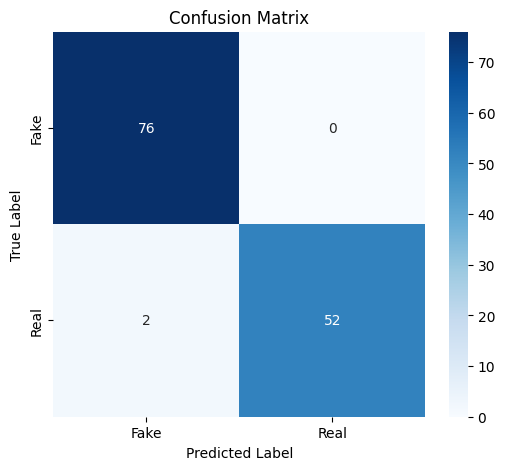

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_true = test_data.classes
y_pred = cnn_model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Fake', 'Real']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [112]:
model_accuracies = {
    'CNN': 98.46,  # Replace with your actual CNN accuracy
    'SVM': 63.85,  # Replace with your actual SVM accuracy
    'KNN': 73.85   # Replace with your actual KNN accuracy
}

In [113]:
# **1. Find the Best Model**
best_model_name = max(model_accuracies, key=model_accuracies.get)
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")
print(f"\nBest Model for Prediction: {best_model_name}")


Model Accuracies:
CNN: 98.46%
SVM: 63.85%
KNN: 73.85%

Best Model for Prediction: CNN


In [114]:
# **2. Function for Prediction**
def predict_image(image_path, cnn_model, svm_model, knn_model, best_model_name):
    """
    Predict the class of an image using the best-performing model.
    """
    from tensorflow.keras.preprocessing import image
    import numpy as np

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    if best_model_name == 'CNN':
        # CNN Prediction
        cnn_prob = cnn_model.predict(img_array)[0][0]
        final_prediction = "Real" if cnn_prob > 0.5 else "Fake"
    elif best_model_name == 'SVM':
        # SVM Prediction
        img_features = pca.transform(scaler.transform(feature_extractor.predict(img_array).reshape(1, -1)))
        svm_label = svm_model.predict(img_features)[0]
        final_prediction = "Real" if svm_label == 1 else "Fake"
    elif best_model_name == 'KNN':
        # KNN Prediction
        img_features = pca.transform(scaler.transform(feature_extractor.predict(img_array).reshape(1, -1)))
        knn_label = knn_model.predict(img_features)[0]
        final_prediction = "Real" if knn_label == 1 else "Fake"
    else:
        raise ValueError("Invalid model name")

    print(f"Prediction using {best_model_name}: {final_prediction}")
    return final_prediction

In [117]:
# **Example Usage**
image_path = "/content/drive/MyDrive/Colab Notebooks/NEPALI REAL NOTE.png"  # Replace with the path to your image
final_prediction = predict_image(image_path, cnn_model, svm_model, knn_model, best_model_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction using CNN: Real


In [121]:
# **Example Usage**
image_path = "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test/Fake/20221216_174403_jpg.rf.020bd01792178f4e0538faa08728da0e.jpg"  # Replace with the path to your image
final_prediction = predict_image(image_path, cnn_model, svm_model, knn_model, best_model_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Prediction using CNN: Fake
